# Larry Gu

## Research question/interests

I would like to investigate on the the average dewpoint. I want to find out the two most relative factors that decides the dewpoint.

# Milestone 3

## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as pf

In [ ]:
path = '../data/raw/climate_data.csv'
df = pd.read_csv(path)

In [ ]:
print(df.shape)
df.head()

(3902, 23)


,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


As columns in this dataframe have very long names, and many of them have spaces in between. It may cause trouble in EDA. So, I will clean the data before I proceed.

In [ ]:
df_new = pf.update_column(path)
df_new.head()

,Date,avg_tem,avg_hum,avg_dew,avg_bar,avg_win,avg_gus,avg_dir,rfm,rfy,...,max_hum,min_hum,max_pre,min_pre,max_win,max_gus,max_hea,Date1,Month,dif_p
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [ ]:
describe_df = df_new.describe().T.sort_values(by=['std'])
print(describe_df)

          count        mean        std     min      25%      50%       75%  \
max_rai  3902.0    0.000000   0.000000   0.000    0.000    0.000    0.0000   
avg_bar  3902.0   29.881420   0.250395  28.200   29.700   29.900   30.0000   
max_pre  3902.0   30.045451   0.258140  29.338   29.866   30.016   30.2030   
dif_p    3902.0    0.343829   0.407499   0.000    0.220    0.293    0.3950   
min_pre  3902.0   29.701622   0.451691  13.266   29.562   29.711   29.8690   
rfm      3902.0    0.451105   0.603462   0.000    0.050    0.220    0.6700   
Month    3902.0    6.395695   3.430231   1.000    3.000    6.000    9.0000   
avg_win  3902.0    5.758893   4.022485   0.000    2.700    4.600    8.0000   
rfy      3902.0    5.486171   4.534444   0.000    0.980    5.080    9.0475   
max_win  3902.0   19.840748  12.235410   0.000   13.800   18.400   24.2000   
avg_gus  3902.0   10.011968  14.117446   0.000    4.500    7.100   12.1000   
min_tem  3902.0   31.227524  14.124424 -27.700   23.000   32.800

I can see that the std of columns regarding humidity and temperature are very close to average dewpoint.
There is a chance they fluctuate on similar/opposite patterns.

<seaborn.axisgrid.FacetGrid>

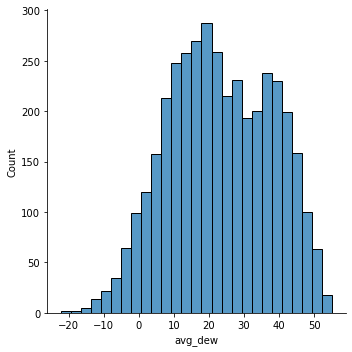

In [ ]:
sns.displot(data=df_new, x="avg_dew")

In [ ]:
sns.lineplot(data=df_new, x="Date", y="avg_dew",hue="min_hum")

<AxesSubplot:xlabel='Date', ylabel='avg_dew'>